# Compulsory 1 ML
MLP for cali housing market.

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import numpy

# Sæt seeds så notebook producer samme vægte ved første træning, hver gang. Gør den reproducerbar.
numpy.random.seed(42)
tensorflow.random.set_seed(42)

# Fetch data and split

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Henter data
housing = fetch_california_housing()

# Separerer data til træning og validering
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [3]:
import numpy as np

X_train = np.asarray(X_train, dtype="float32")
X_valid = np.asarray(X_valid, dtype="float32")
X_test  = np.asarray(X_test,  dtype="float32")
y_train = np.asarray(y_train)
y_valid = np.asarray(y_valid)
y_test  = np.asarray(y_test)

n_features = X_train.shape[1]  # should be 8 for California Housing

# Build model and compile

In [4]:
# --- Normalization: adapt BEFORE building/fit ---
norm_layer = layers.Normalization()
norm_layer.adapt(X_train)  # computes mean/var from NumPy (safe)

model = keras.Sequential([
    keras.Input(shape=(n_features,)),
    norm_layer,
    layers.Dense(100, activation="relu"),
    layers.Dense(150, activation="relu"),
    layers.Dense(50, activation="relu"),
    layers.Dense(50, activation="relu"),
    layers.Dense(50, activation="relu"),
    layers.Dense(1)
])

model.compile(loss="mse", optimizer="sgd", metrics=["RootMeanSquaredError"])

# Callbacks and Hypertuning

In [ ]:
# TODO: Lav noget hypertuning her også.

# ModelCheckpoint.
checkpoint_cb = keras.callbacks.ModelCheckpoint("cali_houseing.keras", save_best_only=True)

# EarlyStopping (with rollback to the best model).
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# TODO: learning rate optimizer callback
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

# Train model

In [ ]:
# ModelCheckpoint.
checkpoint_cb = keras.callbacks.ModelCheckpoint("cali_houseing.keras", save_best_only=True)

# EarlyStopping (with rollback to the best model).
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Learning Scheduler learning rate optimizer callback
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

# TODO: brug hypertuning
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - RootMeanSquaredError: 1.0170 - loss: 1.1211 - val_RootMeanSquaredError: 0.6998 - val_loss: 0.4898
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - RootMeanSquaredError: 0.6415 - loss: 0.4118 - val_RootMeanSquaredError: 0.9069 - val_loss: 0.8224
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - RootMeanSquaredError: 0.6174 - loss: 0.3813 - val_RootMeanSquaredError: 0.8073 - val_loss: 0.6518
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - RootMeanSquaredError: 0.6000 - loss: 0.3602 - val_RootMeanSquaredError: 0.7190 - val_loss: 0.5170
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - RootMeanSquaredError: 0.5910 - loss: 0.3494 - val_RootMeanSquaredError: 0.5971 - val_loss: 0.3565
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - RootMeanSquaredError: 0.5783 - loss: 0.3346 - val_RootMeanSquaredError: 0.5777 - val_loss: 0.3337
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - RootMeanSquar

In [6]:
# Optional: evaluate on test set
test_loss, test_rmse = model.evaluate(X_test, y_test, verbose=0)
print("Test RMSE:", test_rmse)

Test RMSE: 0.5571317076683044


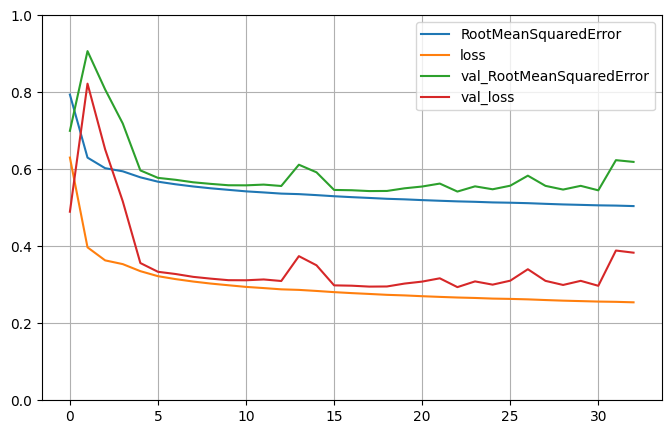

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas

pandas.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()